# Product Recommendation


## Import revelance library 

In [237]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import seaborn  as sns
import numpy as np
from sklearn.metrics import jaccard_score

### Loaded CSV DATA 
#### Data collected by student in class BADS 7205

In [238]:
recomment = pd.read_excel('./Customer Preference Survey.xlsx')  

## Exploratory  data
#### Show sample data 

In [239]:
recomment.head(10)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
0,2021-03-20 11:29:58.994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-20 11:33:10.114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-20 11:53:44.586,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,เคย
3,2021-03-20 11:54:00.984,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,ไม่เคย,เคย,ไม่เคย,เคย
4,2021-03-20 11:54:05.084,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
5,2021-03-20 11:54:12.558,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
6,2021-03-20 11:54:18.477,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
7,2021-03-20 11:54:20.911,เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,NaN,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย
8,2021-03-20 11:54:33.800,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,เคย,เคย,เคย
9,2021-03-20 11:54:40.338,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย,ไม่เคย,...,ไม่เคย,ไม่เคย,NaN,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,ไม่เคย,เคย


## Data Cleansing 

In [240]:
recomment.shape

(48, 62)

In [241]:
recomment.columns #เครื่องย่อยเศษอาหาร

Index(['ประทับเวลา', 'จักรยานเสือภูเขา', 'คอลลาเจน', 'Brownie อวกาศ', 'แม่โขง',
       'Botox', 'กัญชา', 'กัญชง', 'เครื่องวัดความดัน', 'หลอดไฟเปลี่ยนสีได้',
       'คอร์ส bikini wax', 'เก้าอี้นวดไฟฟ้า', 'ต้นไม้ประดับห้อง', 'หมอนข้าง',
       'ตาชั่ง ', 'คอร์สโบท็อกกราม', 'แสงโสม', 'กะหรี่(ปั๊บ)', 'Lego',
       'แฟน ที่แปลว่าพัดลม', 'ยาดอง', 'ชุดนอนไม่ได้นอน',
       'ที่ยกน้ำหนัก (Dumbell)', 'เครื่องดูดฝุ่นอัตโนมัติ (robot)',
       'เนื้อวากิล', 'หมูแดดเดียว', 'drone', 'เครื่องย่อยเศษอาหาร',
       'เสื้อซีทรู', 'ไพ่ยิปซี', 'เนื้อย่าง', 'เครื่องทำลายเอกสาร', 'กระเป๋า',
       'ชาบู', 'Surfskate', 'Board game', 'เครื่องย่อยเศษอาหาร.1',
       'ชุดน้องหมา', 'Omakase', 'เม็ดมะม่วงหิมพานต์', 'ไฟอัจฉริยะ',
       'บัตตาเลี่ยนที่ตัดผม', 'ไดร์เป่าผม Dyson', 'แผ่นเสียง',
       'กรรไกรตัดขนจมูก', 'PS5', 'เครื่องตรวจน้ำตาลในเลือด', 'โรตี', 'กะปิดอง',
       'น้องหมา', 'แพ็คเกจไทยเที่ยวไทย', 'เกมส์ FIFA Online', 'มะม่วงเบา',
       'ห้องน้ำแมวอัตโนมัติ', 'กระเป๋า chanel', 'ข้าวขาหมูคากิคาจักออ

In [242]:
for i in recomment :
    if 'เครื่องย่อยเศษอาหาร' in i :
        print(i)

เครื่องย่อยเศษอาหาร
เครื่องย่อยเศษอาหาร.1


Removed missing valued and duplicated columns value

In [243]:
recomment = recomment.drop([0,1])
missing = recomment.isnull().sum() 
dd = pd.DataFrame(missing,columns = {'NUm'})
dd[dd.NUm > 0]

,NUm
หมูแดดเดียว,1
เครื่องย่อยเศษอาหาร.1,1
เครื่องตรวจน้ำตาลในเลือด,1
แพ็คเกจไทยเที่ยวไทย,1
กระเป๋า chanel,1
ถั่งเช่า,1


In [244]:
recomment1 = recomment.copy()

In [245]:
missing = recomment1.isnull().sum() 
dd = pd.DataFrame(missing,columns = {'NUm'})
dd[dd.NUm > 0]

,NUm
หมูแดดเดียว,1
เครื่องย่อยเศษอาหาร.1,1
เครื่องตรวจน้ำตาลในเลือด,1
แพ็คเกจไทยเที่ยวไทย,1
กระเป๋า chanel,1
ถั่งเช่า,1


### Encoding value & Missing value handling  
Impute null values by median 

In [246]:
recomment1 = recomment1.replace('เคย',1)
recomment1 = recomment1.replace('ไม่เคย',0)
recomment1['Transaction_id'] = [i for i in range(1,(recomment.shape[0]+1))]
recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']]=recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].fillna(
     value= recomment1[['หมูแดดเดียว','เครื่องย่อยเศษอาหาร.1','เครื่องตรวจน้ำตาลในเลือด','แพ็คเกจไทยเที่ยวไทย','กระเป๋า chanel','ถั่งเช่า']].median())




In [247]:
recomment1.head(10)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Transaction_id
2,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,1,1,1,1
3,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,...,0,0.0,0,1.0,1,0,1,0,1,2
4,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,...,0,0.0,0,0.0,1,0,1,1,1,3
5,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0,0,1,4
6,2021-03-20 11:54:18.477,0,1,0,0,1,0,0,0,0,...,0,1.0,0,0.0,1,0,1,1,1,5
7,2021-03-20 11:54:20.911,1,1,0,0,0,0,0,1,0,...,0,0.0,0,0.0,1,0,0,0,1,6
8,2021-03-20 11:54:33.800,0,0,0,1,0,0,0,1,0,...,0,0.0,0,0.0,1,0,1,1,1,7
9,2021-03-20 11:54:40.338,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0,0,1,8
10,2021-03-20 11:54:45.776,0,0,0,0,0,1,0,1,0,...,0,0.0,1,1.0,0,0,0,1,1,9
11,2021-03-20 11:54:46.611,0,1,0,0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0,1,1,10


### Distribution Item

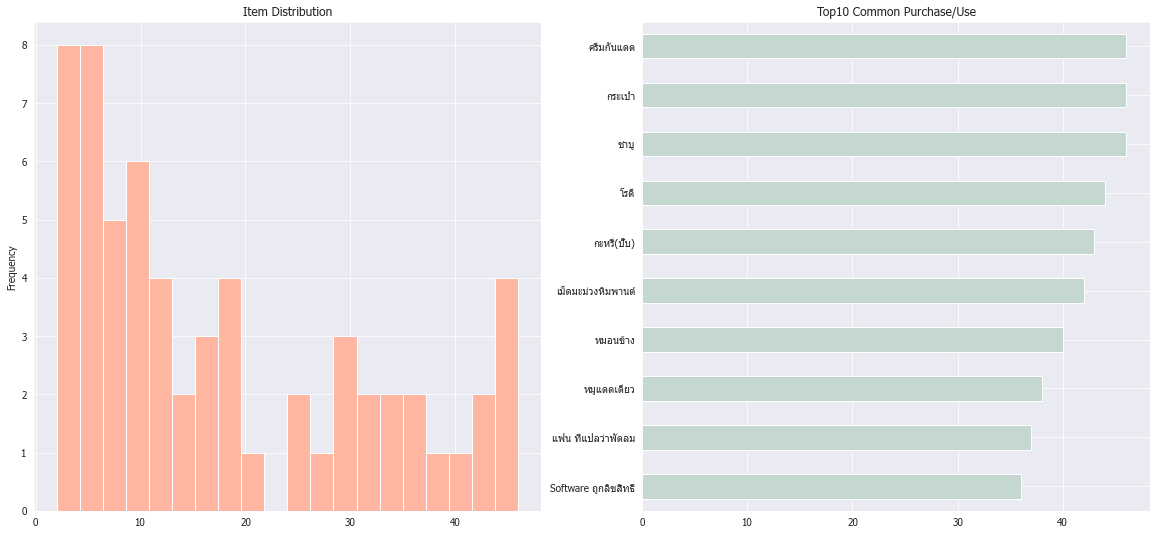

In [248]:
figure, axes = plt.subplots(1, 2,figsize=(20,9))
recomment1.iloc[:,1:-1].sum().plot.hist(bins= 20,color = '#ffb7a1' ,ax=axes[0],title= 'Item Distribution')
recomment1.iloc[:,1:-1].sum().sort_values(ascending= True).tail(10).plot.barh(color = '#c4d7d1' ,ax=axes[1],title='Top10 Common Purchase/Use')
#plt.subplot(1, 2, 1)
#plt.plot()
#plt.title('Distribution: Item') 
plt.savefig('Distribution.png',format ='png',dpi = 150) 

### Removed duplicated column

In [249]:
#เครื่องย่อยเศษอาหาร.1
recomment1 =recomment1.drop(columns=['เครื่องย่อยเศษอาหาร.1'])

Show over all statistics

In [250]:
recomment1.describe().T.sort_values('mean',ascending = False)

,count,mean,std,min,25%,50%,75%,max
Transaction_id,46.0,23.500000,13.422618,1.0,12.25,23.5,34.75,46.0
ครีมกันแดด,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
กระเป๋า,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
ชาบู,46.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
โรตี,46.0,0.956522,0.206185,0.0,1.00,1.0,1.00,1.0
กะหรี่(ปั๊บ),46.0,0.934783,0.249637,0.0,1.00,1.0,1.00,1.0
เม็ดมะม่วงหิมพานต์,46.0,0.913043,0.284885,0.0,1.00,1.0,1.00,1.0
หมอนข้าง,46.0,0.869565,0.340503,0.0,1.00,1.0,1.00,1.0
หมูแดดเดียว,46.0,0.826087,0.383223,0.0,1.00,1.0,1.00,1.0
แฟน ที่แปลว่าพัดลม,46.0,0.804348,0.401085,0.0,1.00,1.0,1.00,1.0


In [251]:
recomment1.iloc[:,1].value_counts()

0    30
1    16
Name: จักรยานเสือภูเขา, dtype: int64

In [255]:
recomment1.head(10)

,ประทับเวลา,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,...,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด,Transaction_id
2,2021-03-20 11:53:44.586,0,0,0,0,0,0,0,0,0,...,0,0.0,0,0.0,0,0,1,1,1,1
3,2021-03-20 11:54:00.984,0,1,0,1,0,0,0,1,0,...,0,0.0,0,1.0,1,0,1,0,1,2
4,2021-03-20 11:54:05.084,1,0,0,0,0,0,0,1,1,...,0,0.0,0,0.0,1,0,1,1,1,3
5,2021-03-20 11:54:12.558,0,0,0,1,0,1,0,0,0,...,0,0.0,0,0.0,0,0,0,0,1,4
6,2021-03-20 11:54:18.477,0,1,0,0,1,0,0,0,0,...,0,1.0,0,0.0,1,0,1,1,1,5
7,2021-03-20 11:54:20.911,1,1,0,0,0,0,0,1,0,...,0,0.0,0,0.0,1,0,0,0,1,6
8,2021-03-20 11:54:33.800,0,0,0,1,0,0,0,1,0,...,0,0.0,0,0.0,1,0,1,1,1,7
9,2021-03-20 11:54:40.338,0,0,0,0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0,0,1,8
10,2021-03-20 11:54:45.776,0,0,0,0,0,1,0,1,0,...,0,0.0,1,1.0,0,0,0,1,1,9
11,2021-03-20 11:54:46.611,0,1,0,0,0,0,0,1,0,...,0,0.0,0,0.0,0,0,0,1,1,10


## Market Basket Analysis

### Association rule & Frequent Items set

find whole support score show the association of occurrent items 

In [256]:
frequent_itemsets = apriori(recomment1.iloc[:,1:-1], min_support=0.5, use_colnames=True)

print(frequent_itemsets.shape)
frequent_itemsets.head(10)

(5871, 2)


,support,itemsets
0,0.543478,(คอลลาเจน)
1,0.717391,(ต้นไม้ประดับห้อง)
2,0.869565,(หมอนข้าง)
3,0.673913,(ตาชั่ง )
4,0.934783,(กะหรี่(ปั๊บ))
5,0.630435,(Lego)
6,0.804348,(แฟน ที่แปลว่าพัดลม)
7,0.608696,(ที่ยกน้ำหนัก (Dumbell))
8,0.543478,(เครื่องดูดฝุ่นอัตโนมัติ (robot))
9,0.673913,(เนื้อวากิล)


In [257]:
# eec = list(frequent_itemsets)
# print(eec[0])
#apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
frequent_itemsets['item_len'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))#.sort_values(by= ['support'],ascending = False)
frequent_itemsets = frequent_itemsets.sort_values(by = ['support'],ascending = False)
frequent_itemsets.head(10)

,support,itemsets,item_len
12,1.000000,(กระเป๋า),1
137,1.000000,"(ชาบู, กระเป๋า)",2
631,1.000000,"(ชาบู, ครีมกันแดด, กระเป๋า)",3
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
19,1.000000,(ครีมกันแดด),1
149,1.000000,"(ชาบู, ครีมกันแดด)",2
13,1.000000,(ชาบู),1
160,0.956522,"(โรตี, ครีมกันแดด)",2
642,0.956522,"(โรตี, ครีมกันแดด, กระเป๋า)",3
140,0.956522,"(โรตี, กระเป๋า)",2


## Show top 10 frequent items set  2 items by support score

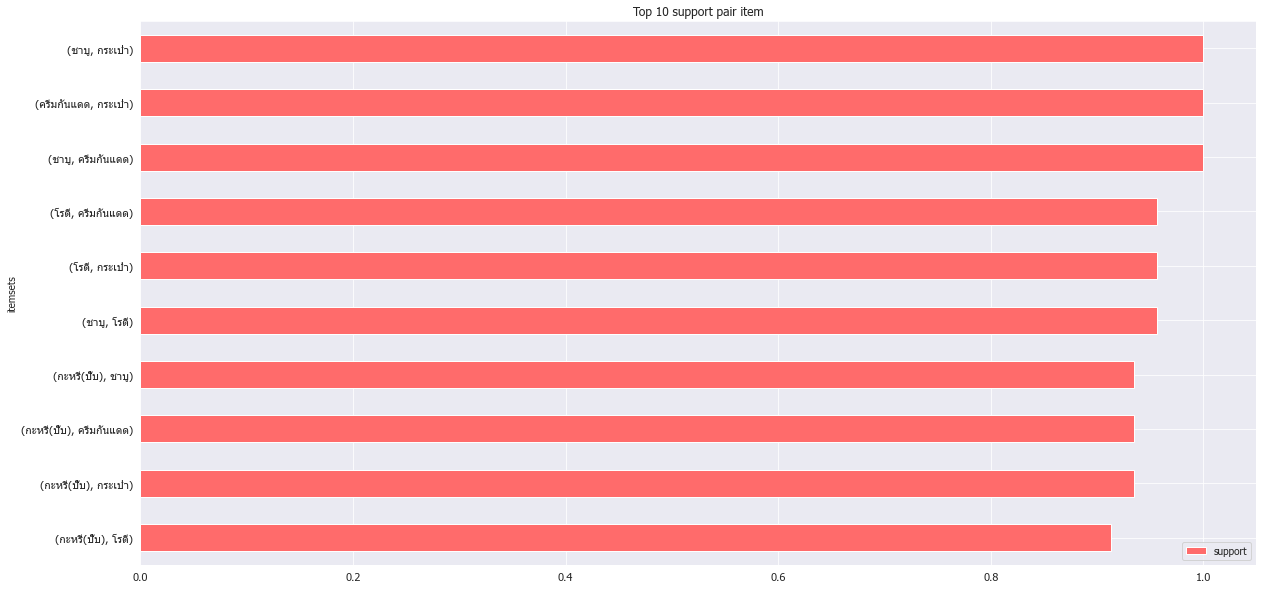

In [258]:
import matplotlib.font_manager as fm
import seaborn as sn
#plt.subplots(figsize=(20,18))
sn.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
frequent_itemsets[(frequent_itemsets['item_len'] == 2) 
                   ].sort_values(by=['support'], ascending= True).tail(10).plot.barh(
                    x='itemsets',y='support',title = 'Top 10 support pair item' ,color = '#ff6b6b',fontsize = 11
,figsize=(20,10))
plt.savefig('Top10_support_len2.png',format ='png',dpi = 150) 

In [259]:
frequent_2len = frequent_itemsets[frequent_itemsets['item_len'] == 2 ]
frequent_2len.head(10)

,support,itemsets,item_len
137,1.000000,"(ชาบู, กระเป๋า)",2
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
149,1.000000,"(ชาบู, ครีมกันแดด)",2
160,0.956522,"(โรตี, ครีมกันแดด)",2
140,0.956522,"(โรตี, กระเป๋า)",2
146,0.956522,"(ชาบู, โรตี)",2
75,0.934783,"(กะหรี่(ปั๊บ), ชาบู)",2
81,0.934783,"(กะหรี่(ปั๊บ), ครีมกันแดด)",2
74,0.934783,"(กะหรี่(ปั๊บ), กระเป๋า)",2
78,0.913043,"(กะหรี่(ปั๊บ), โรตี)",2


## Show top 10 frequent item set  3 items by support score

In [260]:
frequent_3len = frequent_itemsets[frequent_itemsets['item_len'] == 3 ]
frequent_3len.sort_values('support', ascending = False).head(10) #0.956522

,support,itemsets,item_len
631,1.000000,"(ชาบู, ครีมกันแดด, กระเป๋า)",3
656,0.956522,"(ชาบู, ครีมกันแดด, โรตี)",3
628,0.956522,"(ชาบู, กระเป๋า, โรตี)",3
642,0.956522,"(โรตี, ครีมกันแดด, กระเป๋า)",3
428,0.934783,"(กะหรี่(ปั๊บ), กระเป๋า, ชาบู)",3
434,0.934783,"(กะหรี่(ปั๊บ), ครีมกันแดด, กระเป๋า)",3
440,0.934783,"(กะหรี่(ปั๊บ), ครีมกันแดด, ชาบู)",3
431,0.913043,"(กะหรี่(ปั๊บ), กระเป๋า, โรตี)",3
627,0.913043,"(ชาบู, กระเป๋า, เม็ดมะม่วงหิมพานต์)",3
437,0.913043,"(กะหรี่(ปั๊บ), ชาบู, โรตี)",3


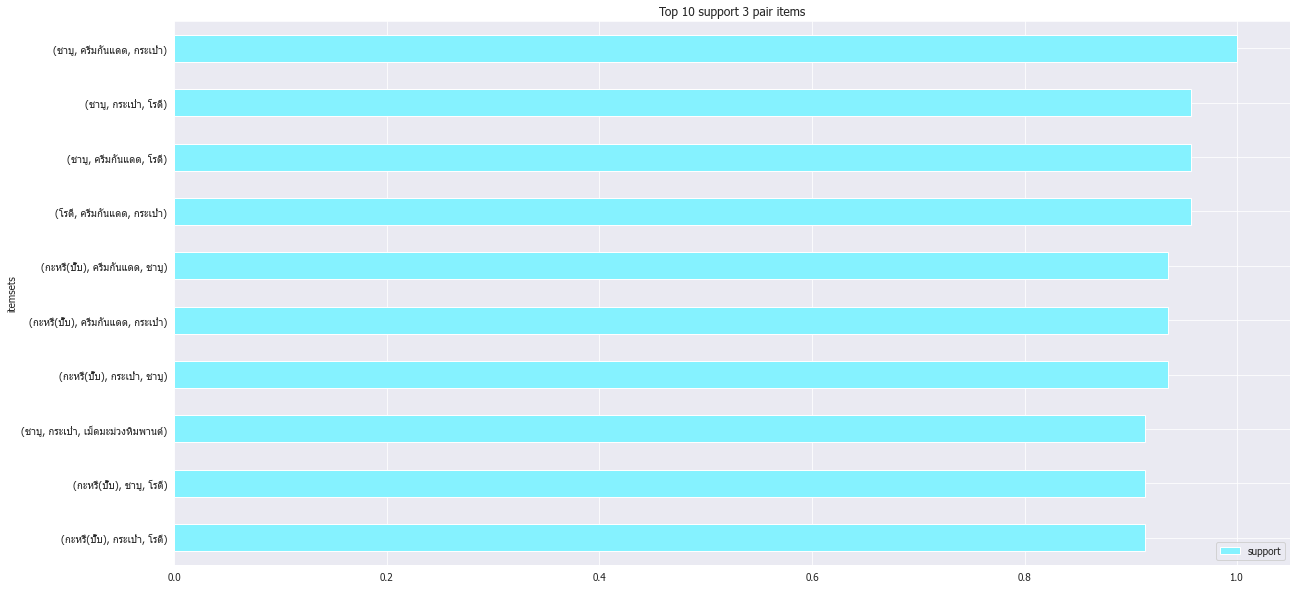

In [231]:
## Plot Top 10 Support Score with  3 itmes pair  
sn.set_style("darkgrid",{"font.sans-serif":['simhei', 'Tahoma']})
frequent_itemsets[(frequent_itemsets['item_len'] == 3) & 
                  ((frequent_itemsets['support'] > 0.9)  
                   )].sort_values(by=['support'], ascending= True).tail(10).plot.barh(
                    x='itemsets',y='support',title = 'Top 10 support 3 pair items',color= '#85f2ff'
,figsize=(20,10))
plt.savefig('Top10_support.png',format = 'png',dpi = 150)

In [79]:
# for item in frequent_itemsets:

#     # first index of the inner list
#     # Contains base item and add item
#     pair = item[0] 
#     print(pair)
# #     items = [x for x in pair]
# #     print("Rule: " + items[0] + " -> " + items[1])

# #     #second index of the inner list
# #     print("Support: " + str(item[1]))

# #     #third index of the list located at 0th
# #     #of the third index of the inner list

# #     print("Confidence: " + str(item[2][0][2]))
# #     print("Lift: " + str(item[2][0][3]))
# #     print("=====================================")

In [261]:
frequent_2len.head()

,support,itemsets,item_len
137,1.000000,"(ชาบู, กระเป๋า)",2
143,1.000000,"(ครีมกันแดด, กระเป๋า)",2
149,1.000000,"(ชาบู, ครีมกันแดด)",2
160,0.956522,"(โรตี, ครีมกันแดด)",2
140,0.956522,"(โรตี, กระเป๋า)",2


Running a market basket analysis. Here's the visualzation of 1-itemset association rules (filtered by Support > 0.5 and Lift > 1.01)
Nodes represent items and directed edges represent rules (antecedents ➞ consequents). Edge labels annotates Lift values. Note that for 1-to-1-itemset, both directions of rules (A➞B, B➞A) have the same lift values, so in the case, we always have bi-directional edges (A⬌B).

In [262]:
rule_sim = association_rules(frequent_itemsets, metric="lift", min_threshold= 1.0)
rule_sim = rule_sim.sort_values('lift',ascending = False)
print(rule_sim.shape)
rule_sim.head(10)


(383348, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
307195,"(หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, Software ...","(ชาบู, เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
261467,"(หมูแดดเดียว, โรตี, เนื้อย่าง, Software ถูกลิข...","(ครีมกันแดด, เนื้อวากิล, กระเป๋า, เม็ดมะม่วงหิ...",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
269149,"(หมูแดดเดียว, โรตี, เนื้อย่าง, Software ถูกลิข...","(ชาบู, ครีมกันแดด, เนื้อวากิล, เม็ดมะม่วงหิมพา...",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
308700,"(หมูแดดเดียว, เนื้อย่าง, กระเป๋า, Software ถูก...","(โรตี, เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
308706,"(หมูแดดเดียว, โรตี, เนื้อย่าง, Software ถูกลิข...","(เนื้อวากิล, กระเป๋า, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
308734,"(หมูแดดเดียว, เนื้อย่าง, Software ถูกลิขสิทธิ์)","(โรตี, เนื้อวากิล, กระเป๋า, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
269143,"(หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, Software ...","(ชาบู, เนื้อวากิล, โรตี, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
261400,"(Software ถูกลิขสิทธิ์, ครีมกันแดด, กระเป๋า, เ...","(โรตี, เนื้อวากิล, เม็ดมะม่วงหิมพานต์)",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
253182,"(หมูแดดเดียว, เนื้อย่าง, Software ถูกลิขสิทธิ์)","(ชาบู, เม็ดมะม่วงหิมพานต์, ครีมกันแดด, กระเป๋า...",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826
247434,"(หมูแดดเดียว, โรตี, เนื้อย่าง, Software ถูกลิข...","(ชาบู, เม็ดมะม่วงหิมพานต์, ครีมกันแดด, กระเป๋า...",0.521739,0.652174,0.5,0.958333,1.469444,0.159735,8.347826


In [300]:
simple_rules = rules[(rules['antecedents'].apply(len) == 1) & (rules['consequents'].apply(len) == 1) & (rules['lift'] > 1.05) & (rules['confidence'] > 0.5)]
print(simple_rules.shape)

simple_rules.sort_values('lift', ascending=False).head(10)

(46, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6383,{เนื้อวากิล},{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
6382,{เนื้อย่าง},{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
106627,{Lego},{ต้นไม้ประดับห้อง},0.630435,0.717391,0.543478,0.862069,1.202,0.091210,2.048913
106626,{ต้นไม้ประดับห้อง},{Lego},0.717391,0.630435,0.543478,0.757576,1.202,0.091210,1.524457
160753,{Lego},{เนื้อย่าง},0.630435,0.717391,0.521739,0.827586,1.154,0.069471,1.639130
160752,{เนื้อย่าง},{Lego},0.717391,0.630435,0.521739,0.727273,1.154,0.069471,1.355072
28348,{Software ถูกลิขสิทธิ์},{เนื้อวากิล},0.782609,0.673913,0.586957,0.750000,1.113,0.059546,1.304348
28349,{เนื้อวากิล},{Software ถูกลิขสิทธิ์},0.673913,0.782609,0.586957,0.870968,1.113,0.059546,1.684783
60521,{ต้นไม้ประดับห้อง},{เนื้อย่าง},0.717391,0.717391,0.565217,0.787879,1.098,0.050567,1.332298
60520,{เนื้อย่าง},{ต้นไม้ประดับห้อง},0.717391,0.717391,0.565217,0.787879,1.098,0.050567,1.332298


In [281]:
rules_1 =  rule_sim[(rule_sim.antecedents.apply(len)==1) & (rule_sim.consequents.apply(len)==1)&(rule_sim.lift >= 1.05)].sort_values('lift',ascending= False)
print(rules_1.shape)
rules_1['antecedents'] = rules_1.antecedents.apply(lambda x : list(x)[0] )  
rules_1['consequents'] = rules_1.consequents.apply(lambda x : list(x)[0]) 
rules_1['lift'] = rules_1.lift.apply(lambda x :  round(x,3))
# rules_1
rules_1.head(10)

(46, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16646,เนื้อย่าง,เนื้อวากิล,0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
16647,เนื้อวากิล,เนื้อย่าง,0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
151190,ต้นไม้ประดับห้อง,Lego,0.717391,0.630435,0.543478,0.757576,1.202,0.091210,1.524457
151191,Lego,ต้นไม้ประดับห้อง,0.630435,0.717391,0.543478,0.862069,1.202,0.091210,2.048913
216199,Lego,เนื้อย่าง,0.630435,0.717391,0.521739,0.827586,1.154,0.069471,1.639130
216198,เนื้อย่าง,Lego,0.717391,0.630435,0.521739,0.727273,1.154,0.069471,1.355072
49455,เนื้อวากิล,Software ถูกลิขสิทธิ์,0.673913,0.782609,0.586957,0.870968,1.113,0.059546,1.684783
49454,Software ถูกลิขสิทธิ์,เนื้อวากิล,0.782609,0.673913,0.586957,0.750000,1.113,0.059546,1.304348
92862,เนื้อย่าง,ต้นไม้ประดับห้อง,0.717391,0.717391,0.565217,0.787879,1.098,0.050567,1.332298
92863,ต้นไม้ประดับห้อง,เนื้อย่าง,0.717391,0.717391,0.565217,0.787879,1.098,0.050567,1.332298


In [277]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.05)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==2) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28350,"{หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
49226,"{เนื้อย่าง, Software ถูกลิขสิทธิ์}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
7023,"{โรตี, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
6042,"{เนื้อย่าง, กระเป๋า}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
6043,"{กระเป๋า, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
6876,"{ชาบู, เนื้อย่าง}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
6877,"{ชาบู, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
7022,"{โรตี, เนื้อย่าง}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957
5951,"{ครีมกันแดด, เนื้อวากิล}",{เนื้อย่าง},0.673913,0.717391,0.652174,0.967742,1.349,0.168715,8.760870
5950,"{เนื้อย่าง, ครีมกันแดด}",{เนื้อวากิล},0.717391,0.673913,0.652174,0.909091,1.349,0.168715,3.586957


In [278]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.05)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==3) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
304382,"{หมูแดดเดียว, เนื้อย่าง, Software ถูกลิขสิทธิ์}",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
37363,"{หมูแดดเดียว, เนื้อย่าง, เม็ดมะม่วงหิมพานต์}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
37351,"{โรตี, หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
37377,"{ชาบู, หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
37586,"{หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
37388,"{หมูแดดเดียว, เนื้อย่าง, กระเป๋า}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
46804,"{ชาบู, เนื้อย่าง, Software ถูกลิขสิทธิ์}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
54362,"{เนื้อย่าง, กระเป๋า, Software ถูกลิขสิทธิ์}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
44749,"{กะหรี่(ปั๊บ), หมูแดดเดียว, เนื้อย่าง}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217
46828,"{เนื้อย่าง, ครีมกันแดด, Software ถูกลิขสิทธิ์}",{เนื้อวากิล},0.608696,0.673913,0.565217,0.928571,1.378,0.155009,4.565217


In [279]:
rules = association_rules(frequent_itemsets , metric="lift", min_threshold= 1.05)
rules['antecedents'] = rules.antecedents.apply(lambda x : set(x))  
rules['consequents'] = rules.consequents.apply(lambda x : set(x)) 
rules['lift'] = rules.lift.apply(lambda x :  round(x,3))
rules[ (rules.antecedents.apply(len)==4) & (rules.consequents.apply(len)==1)].sort_values('lift',ascending= False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
275683,"{หมูแดดเดียว, ชาบู, เนื้อย่าง, Software ถูกลิข...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
275727,"{เนื้อย่าง, หมูแดดเดียว, กระเป๋า, Software ถูก...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
275063,"{หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, Software ...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
275649,"{เนื้อย่าง, หมูแดดเดียว, Software ถูกลิขสิทธิ์...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
275107,"{หมูแดดเดียว, โรตี, เนื้อย่าง, Software ถูกลิข...",{เนื้อวากิล},0.521739,0.673913,0.500000,0.958333,1.422,0.148393,7.826087
32517,"{หมูแดดเดียว, ชาบู, เนื้อย่าง, กระเป๋า}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
32151,"{หมูแดดเดียว, โรตี, เนื้อย่าง, เม็ดมะม่วงหิมพา...",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
29991,"{หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, เม็ดมะม่ว...",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
32179,"{หมูแดดเดียว, ชาบู, ครีมกันแดด, เนื้อย่าง}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261
32203,"{หมูแดดเดียว, เนื้อย่าง, ครีมกันแดด, โรตี}",{เนื้อวากิล},0.630435,0.673913,0.586957,0.931034,1.382,0.162098,4.728261


#### Highest lift score 

In [282]:
max(rules_1.lift)

1.349

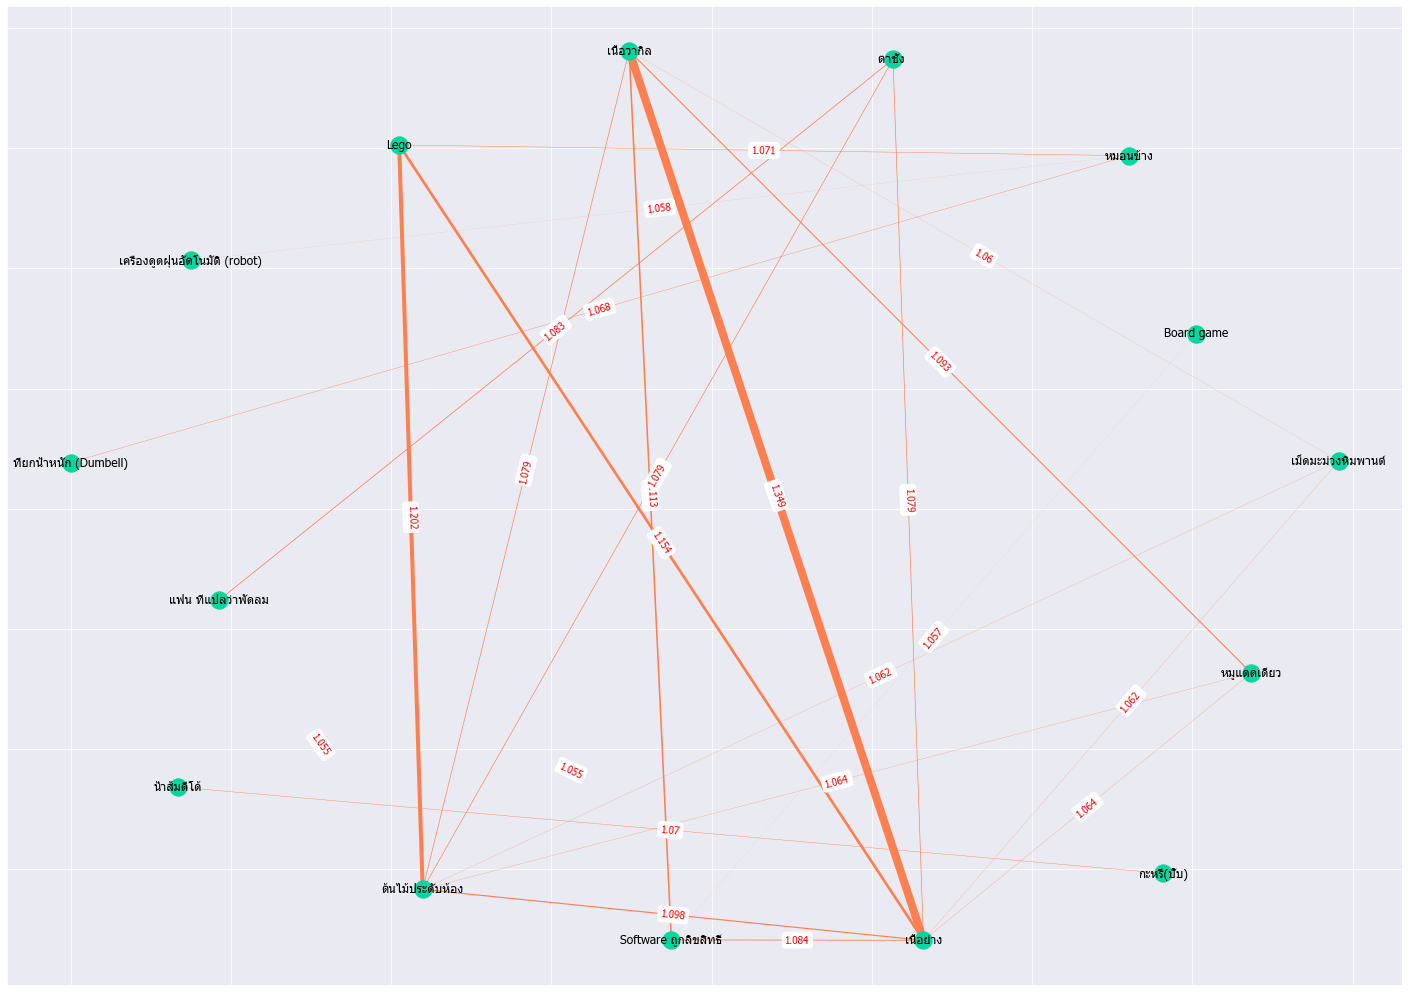

In [299]:
from matplotlib.pyplot import figure, text
import networkx as nx

fig, ax =plt.subplots(figsize=(25,18))
GA=nx.from_pandas_edgelist(rules_1,source='antecedents',target='consequents',edge_attr=['lift'])
#GA.nodes()
# nx.draw(GA,with_labels=True,node_color='orange')
# plt.show()
weight = [ 0.5+float(i['lift'])*4 for i in dict(GA.edges).values()] 
weight = ((np.array(weight)- min(weight))/(max(weight)-min(weight)))*8
labels = [i for i in dict(GA.nodes)]
labels = {i:i for i in dict(GA.nodes).keys()}
#pos = nx.spring_layout(GA)
pos = nx.spring_layout(GA,weight='weight',  k=5)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = '#06D6A0') #	#ff7f50 '#06D6A0'
nx.draw_networkx_edges(GA, pos,edge_color='#ff7f50',arrowsize=10, width=weight, ax=ax ) ##, labels=True)
edge_labels = nx.get_edge_attributes(GA, 'lift')
#edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red')#,  **labels_params)
_ = nx.draw_networkx_labels(GA, pos, labels, ax=ax)
plt.savefig('graph_item_1_1.png',format = 'png',dpi = 150) 


### Visualizing results

#### Support vs Confidence

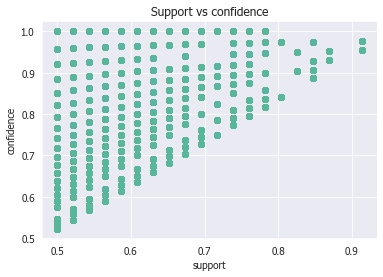

In [87]:
rules = rules.sort_values(['lift'],ascending = False)
#display(rules)

plt.scatter(rules['support'], rules['confidence'], alpha=0.5, color  = '#58b69b')
plt.xlabel('support')
plt.ylabel('confidence')
plt.title('Support vs confidence')
plt.plot(figsize=(50,50))
plt.savefig('Support_vs_confidence.png',format = 'png',dpi = 150) 

#### Support vs lift

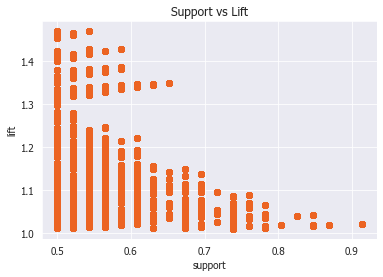

In [88]:
rules = rules.sort_values(['lift'],ascending = False)
#display(rules)
plt.scatter(rules['support'], rules['lift'], alpha=0.5, color = '#ed6423')
plt.xlabel('support')
plt.ylabel('lift')
plt.title('Support vs Lift')
plt.plot(figsize=(50,50))
plt.savefig('Support_vs_lift.png',format = 'png',dpi = 150) 

#### Lift vs Confidence

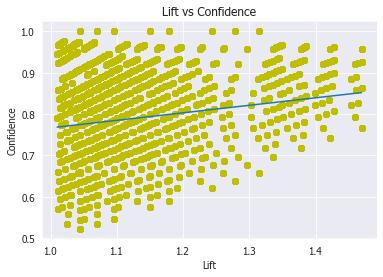

In [89]:
fit = np.polyfit(rules['lift'], rules['confidence'], 1)
fit_fn = np.poly1d(fit)
plt.plot(rules['lift'], rules['confidence'], 'yo', rules['lift'], fit_fn(rules['lift'])  )
plt.xlabel('Lift')
plt.ylabel('Confidence')
plt.title('Lift vs Confidence')
plt.plot(figsize=(30,30))
plt.savefig('lift_VS_confident.png',format = 'png',dpi = 150) 

In [90]:
fit_fn(rules['lift'])

array([0.85191353, 0.85191353, 0.85191353, ..., 0.7685634 , 0.7685634 ,
       0.7685634 ])

## Collaborative Filtering - Item Similarity

By using users' ratings for each item as its feature vector, calculates cosine similarity values for each pair of items. We could recommend items based on item similarity.
Filtering the similarity using 0.65 threshold, and visualize them in graph. A node represents an item. Edge thickness and color represent cosine similarity between 2 items.

In [91]:
item_item_matrix = pd.DataFrame(index=recomment1.columns,columns=recomment1.columns)
item_item_matrix1 = item_item_matrix.iloc[1:-1,1:-1]

In [92]:
recomment2 = recomment1.iloc[:,1:-1]
recomment2.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0.0,0,0.0,0,0,1,1,1
3,0,1,0,1,0,0,0,1,0,0,...,1,0,0.0,0,1.0,1,0,1,0,1
4,1,0,0,0,0,0,0,1,1,0,...,1,0,0.0,0,0.0,1,0,1,1,1
5,0,0,0,1,0,1,0,0,0,0,...,0,0,0.0,0,0.0,0,0,0,0,1
6,0,1,0,0,1,0,0,0,0,0,...,0,0,1.0,0,0.0,1,0,1,1,1
7,1,1,0,0,0,0,0,1,0,0,...,1,0,0.0,0,0.0,1,0,0,0,1
8,0,0,0,1,0,0,0,1,0,0,...,1,0,0.0,0,0.0,1,0,1,1,1
9,0,0,0,0,0,0,0,1,0,0,...,0,0,0.0,0,0.0,0,0,0,0,1
10,0,0,0,0,0,1,0,1,0,0,...,0,0,0.0,1,1.0,0,0,0,1,1
11,0,1,0,0,0,0,0,1,0,0,...,1,0,0.0,0,0.0,0,0,0,1,1


### Create matrix finding similarity 

Matrix showing a similarity item by cosine similarity score with the item that has item rating on each user. the highest similarity scores are 1 when items A and B rating by the whole user .Otherwise 
similarity score has decreased by cosine distance .

In [93]:
from scipy.spatial.distance import cosine

for i in range(0,len(item_item_matrix1.columns)) :
    # Loop through the columns for each column
    for j in range(0,len(item_item_matrix1.columns)) :
      # Fill in placeholder with cosine similarities
      item_item_matrix1.iloc[i,j] =  1-cosine(recomment2.iloc[:,i],recomment2.iloc[:,j])

In [94]:
item_item_matrix1.head(10)

,จักรยานเสือภูเขา,คอลลาเจน,Brownie อวกาศ,แม่โขง,Botox,กัญชา,กัญชง,เครื่องวัดความดัน,หลอดไฟเปลี่ยนสีได้,คอร์ส bikini wax,...,มะม่วงเบา,ห้องน้ำแมวอัตโนมัติ,กระเป๋า chanel,ข้าวขาหมูคากิคาจักออนไลน์,ถั่งเช่า,หมอนสุขภาพสำหรับคนนอนไม่หลับ,อาหารแมวคลีนเพื่อสุขภาพลดหุ่น,น้ำส้มดีโด้,Software ถูกลิขสิทธิ์,ครีมกันแดด
จักรยานเสือภูเขา,1,0.55,0.33541,0.400892,0.416667,0.265165,0.25,0.458831,0.452267,0.125,...,0.471405,0.433013,0.33541,0.306186,0.0883883,0.471405,0.375,0.456435,0.583333,0.589768
คอลลาเจน,0.55,1,0.268328,0.320713,0.533333,0.141421,0.2,0.458831,0.361814,0.4,...,0.565685,0.34641,0.357771,0.244949,0.282843,0.612826,0.4,0.657267,0.7,0.73721
Brownie อวกาศ,0.33541,0.268328,1,0.478091,0.447214,0.632456,0.67082,0.102598,0.13484,0.223607,...,0.210819,0.516398,0.8,0.547723,0.158114,0.316228,0.447214,0.244949,0.372678,0.32969
แม่โขง,0.400892,0.320713,0.478091,1,0.267261,0.566947,0.400892,0.367884,0.241747,0.133631,...,0.377964,0.46291,0.358569,0.218218,0.188982,0.440959,0.267261,0.39036,0.400892,0.551677
Botox,0.416667,0.533333,0.447214,0.267261,1,0.235702,0.333333,0.229416,0.301511,0.166667,...,0.235702,0.19245,0.596285,0.408248,0.117851,0.392837,0.166667,0.30429,0.5,0.442326
กัญชา,0.265165,0.141421,0.632456,0.566947,0.235702,1,0.53033,0.324443,0,0,...,0.0833333,0.408248,0.474342,0.433013,0.125,0.166667,0.353553,0.193649,0.353553,0.417029
กัญชง,0.25,0.2,0.67082,0.400892,0.333333,0.53033,1,0.114708,0.150756,0,...,0.235702,0.288675,0.447214,0.408248,0,0.117851,0.25,0.182574,0.333333,0.294884
เครื่องวัดความดัน,0.458831,0.458831,0.102598,0.367884,0.229416,0.324443,0.114708,1,0.415029,0.114708,...,0.43259,0.132453,0.102598,0.280976,0.324443,0.378517,0.229416,0.460739,0.573539,0.642685
หลอดไฟเปลี่ยนสีได้,0.452267,0.361814,0.13484,0.241747,0.301511,0,0.150756,0.415029,1,0.301511,...,0.284268,0,0.13484,0.246183,0.213201,0.355335,0.301511,0.495434,0.552771,0.48901
คอร์ส bikini wax,0.125,0.4,0.223607,0.133631,0.166667,0,0,0.114708,0.301511,1,...,0.353553,0,0.223607,0.408248,0.353553,0.471405,0.25,0.365148,0.25,0.294884


In [95]:
item_item_matrix1 = item_item_matrix1.dropna()
#sns.heatmap(item_item_matrix1)
#item_item_matrix1[item_item_matrix1.isnull()]
#sns.heatmap(item_item_matrix1.dropna())
# xx = item_item_matrix1[item_item_matrix1.isnull()]
# #xx[xx.notnull()]
# xx.head()

In [96]:
links = item_item_matrix.rename_axis('related item', 
                                     axis='columns').stack().reset_index()
links.columns = ['item', 'related item','value']

In [97]:
links['value'] = links.value.apply( lambda x :  round(x,3))
links.head(10)

,item,related item,value
0,จักรยานเสือภูเขา,จักรยานเสือภูเขา,1.000
1,จักรยานเสือภูเขา,คอลลาเจน,0.550
2,จักรยานเสือภูเขา,Brownie อวกาศ,0.335
3,จักรยานเสือภูเขา,แม่โขง,0.401
4,จักรยานเสือภูเขา,Botox,0.417
5,จักรยานเสือภูเขา,กัญชา,0.265
6,จักรยานเสือภูเขา,กัญชง,0.250
7,จักรยานเสือภูเขา,เครื่องวัดความดัน,0.459
8,จักรยานเสือภูเขา,หลอดไฟเปลี่ยนสีได้,0.452
9,จักรยานเสือภูเขา,คอร์ส bikini wax,0.125


In [98]:
links= links.loc[(links['item'] !=links['related item'])].sort_values('value',ascending = False)
links.shape

(3540, 3)

In [99]:
links_filtered=links.loc[  
                         (links['item'] != links['related item'])& (links['value'] > 0.75) ]
links_filtered.shape

(230, 3)

In [100]:
links_filtered.sort_values(by = ['value'], ascending = False).head(10)

,item,related item,value
1892,กระเป๋า,ชาบู,1.000
1919,กระเป๋า,ครีมกันแดด,1.000
1979,ชาบู,ครีมกันแดด,1.000
3571,ครีมกันแดด,กระเป๋า,1.000
1951,ชาบู,กระเป๋า,1.000
3572,ครีมกันแดด,ชาบู,1.000
2759,โรตี,ครีมกันแดด,0.978
2732,โรตี,ชาบู,0.978
1965,ชาบู,โรตี,0.978
1905,กระเป๋า,โรตี,0.978


## Graph network show the relationship on each pair of items by similarity score
We could recommend items based on item similarity.
Filtering the similarity using 0.75 threshold, and visualize them in graph. A node represents an item. Edge thickness and color represent cosine similarity between 2 items.

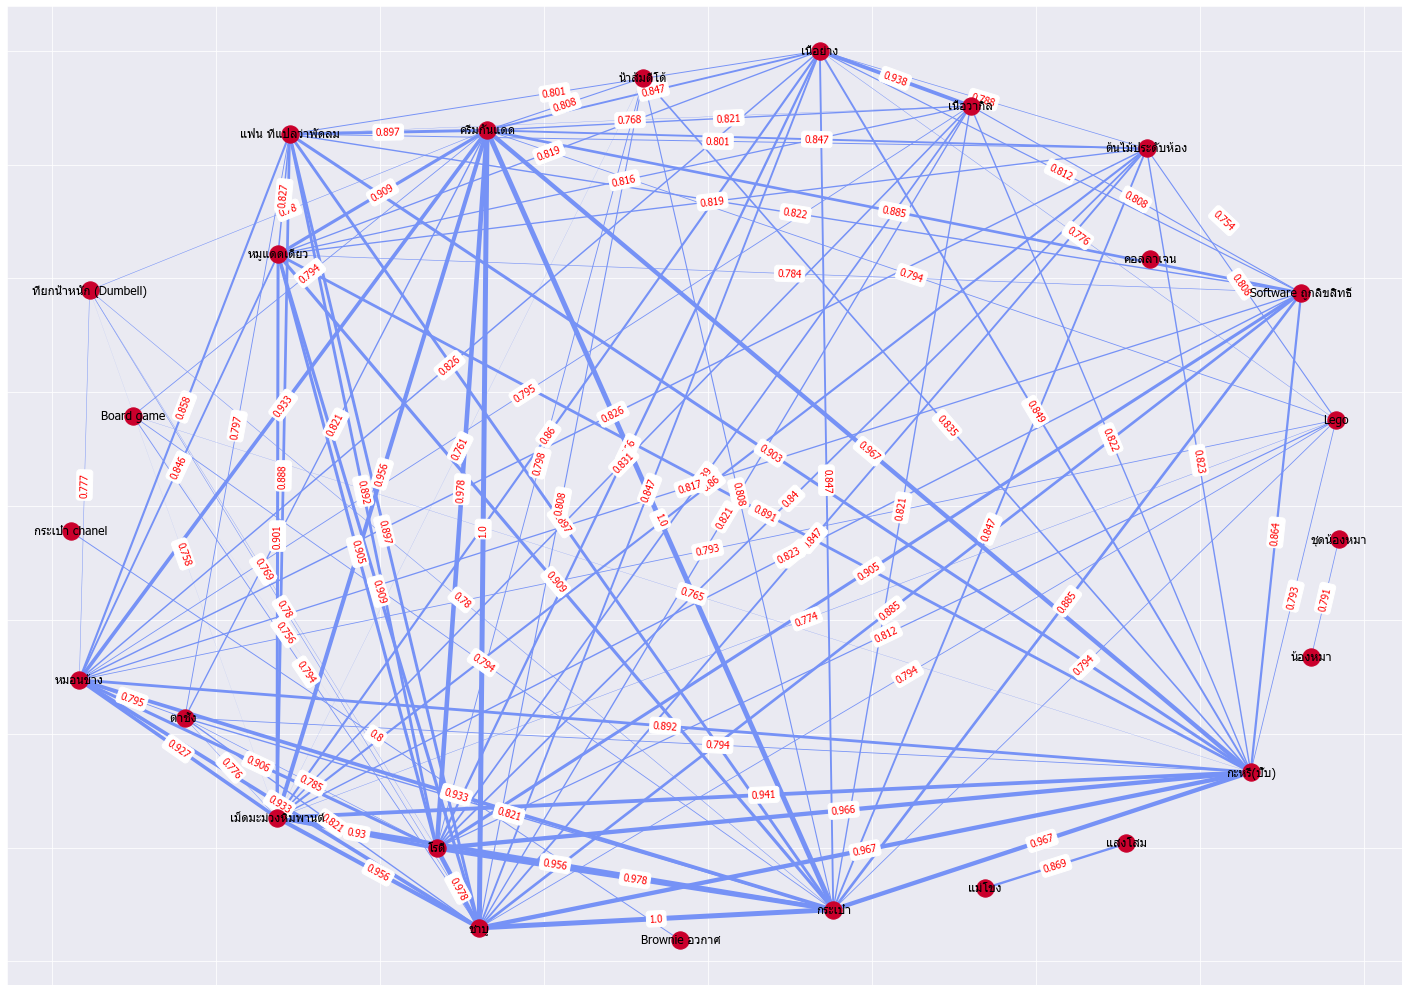

In [101]:
fig, ax =plt.subplots(figsize=(25,18))
GA=nx.from_pandas_edgelist(links_filtered,source='item',target='related item',edge_attr=['value'])
#GA.nodes()
# nx.draw(GA,with_labels=True,node_color='orange')
# plt.show()
weight2 = [ float(i['value']) for i in dict(GA.edges).values()] 
weight2 = ((np.array(weight2)- min(weight2))/(max(weight2)-min(weight2)))*5
labels2 = [i for i in dict(GA.nodes)]
labels2 = {i:i for i in dict(GA.nodes).keys()}
#pos = nx.spring_layout(GA)
pos = nx.spring_layout(GA,weight='weight2',  k=12)
nx.draw_networkx_nodes(GA, pos,ax = ax,node_color = '#ca002c') # #e636e1 ##f9c3ff
nx.draw_networkx_edges(GA, pos,edge_color='#7692f6',arrowsize=10, width=weight2, ax=ax ) ##, labels=True)
edge_labels = nx.get_edge_attributes(GA, 'value')
#edge_labels = nx.get_edge_attributes(G, 'lift')
nx.draw_networkx_edge_labels(GA, pos, edge_labels=edge_labels, font_color='red')#,  **labels_params)
_ = nx.draw_networkx_labels(GA, pos, labels2, ax=ax)
plt.savefig('collaborative.png',format = 'png',dpi = 150) 